In [1]:
#Listing 3.1 – Importing necessary packages
#Import required libraries
import torch as tch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [2]:
#Listing 3.2 – Creating a toy dataset
samples = 5000
#Let’s divide the toy dataset into training (80%) and rest for validation.
train_split = int(samples*0.8)
#Create a dummy classification dataset with data type <class 'numpy.ndarray'>
X, y = make_blobs(n_samples=samples, centers=2, n_features=64, cluster_std=10, random_state=2020)
y = y.reshape(-1,1)
# print(type(X),type(y))
#Convert the numpy datasets to Torch Tensors with data type <class 'torch.Tensor'>
X,y = tch.from_numpy(X),tch.from_numpy(y)
# print(type(X),type(y))
X,y =X.float(),y.float()


In [3]:
#Split the datasets inot train and test(validation)
X_train, x_test = X[0:train_split,:], X[train_split:,:]
Y_train, y_test = y[0:train_split,:], y[train_split:,:]
#Print shapes of each dataset
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)
print("X.dtype",X.dtype)
print("y.dtype",y.dtype)

X_train.shape: torch.Size([4000, 64])
x_test.shape: torch.Size([1000, 64])
Y_train.shape: torch.Size([4000, 1])
y_test.shape: torch.Size([1000, 1])
X.dtype torch.float32
y.dtype torch.float32


In [4]:
#Listing 3.3 – Define a feed forward neural network

#Define a neural network with 3 hidden layers and 1 output layer
#Hidden Layers will have 64,256 and 1024 neurons (2^?)
#Output layers will have 1 neuron

class NeuralNetwork(nn.Module): #inherit from nn.Module
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(64, 256) #64 inputs and 256 outputs in first layer
        self.relu1 = nn.ReLU() 
        self.fc2 = nn.Linear(256, 1024) #second layer has 256 inputs and 1024 outputs
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(1024, 1) #output layer has 1024 inputs and 1 outputs
        self.final = nn.Sigmoid()
    def forward(self, x): # define forward method
        op = self.fc1(x)  # x is inputs of inout layer
        op = self.relu1(op)        
        op = self.fc2(op)
        op = self.relu2(op)
        op = self.out(op)
        y = self.final(op)
        return y 

In [5]:
#Listing 3.4 –Define loss, optimizer and Training function for  neural network

#Define function for training a network
def train_network(model,optimizer,loss_function,num_epochs,batch_size,X_train,Y_train):
    #Explicitly start model training
    model.train()
    loss_across_epochs = []
    for epoch in range(num_epochs):
        train_loss= 0.0
        for i in range(0,X_train.shape[0],batch_size):
            #Extract train batch from X and Y
            input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
            labels     = Y_train[i:min(X_train.shape[0],i+batch_size)]
            #set the gradients to zero before starting to do backpropragation 
            optimizer.zero_grad()
            #Forward pass
            output_data  = model(input_data)
            #Caculate loss
            loss = loss_function(output_data, labels)
            #Backpropogate
            loss.backward()
            #Update weights
            optimizer.step()

            train_loss += loss.item() * batch_size

        print("Epoch: {} - Loss:{:.4f}".format(epoch+1,train_loss ))
        loss_across_epochs.extend([train_loss])        

    #Predict
    y_test_pred = model(x_test)
    a =np.where(y_test_pred>0.5,1,0) #?? why needs this line?
    return(loss_across_epochs)
###------------END OF FUNCTION---------------------

#Create an object of the Neural Network class
model = NeuralNetwork()

#Define loss function
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

#Define Optimizer
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001)

#Define epochs and batch size
num_epochs = 10
batch_size=16


#Calling the function for training and pass model, optimizer, loss and related paramters
adam_loss = train_network(model,adam_optimizer,loss_function,num_epochs,batch_size,X_train,Y_train)
print(adam_loss)


Epoch: 1 - Loss:107.9976
Epoch: 2 - Loss:8.7379
Epoch: 3 - Loss:8.2709
Epoch: 4 - Loss:0.8967
Epoch: 5 - Loss:0.2220
Epoch: 6 - Loss:0.0017
Epoch: 7 - Loss:0.0016
Epoch: 8 - Loss:0.0014
Epoch: 9 - Loss:0.0012
Epoch: 10 - Loss:0.0011
[107.99756091092797, 8.737869359303124, 8.27088334455905, 0.8966823952427031, 0.22200632622444377, 0.0017356311528686694, 0.0015582724341163814, 0.0013928442854569977, 0.0012428954945623895, 0.001079119176846683]


RMSProp...
Epoch: 1 - Loss:6059.1007
Epoch: 2 - Loss:1857.5505
Epoch: 3 - Loss:1227.3658
Epoch: 4 - Loss:4494.9955
Epoch: 5 - Loss:1551.0561
Epoch: 6 - Loss:605.0904
Epoch: 7 - Loss:527.9995
Epoch: 8 - Loss:4544.7891
Epoch: 9 - Loss:2507.8707
Epoch: 10 - Loss:818.9230
Adam...
Epoch: 1 - Loss:107.9976
Epoch: 2 - Loss:8.7379
Epoch: 3 - Loss:8.2709
Epoch: 4 - Loss:0.8967
Epoch: 5 - Loss:0.2220
Epoch: 6 - Loss:0.0017
Epoch: 7 - Loss:0.0016
Epoch: 8 - Loss:0.0014
Epoch: 9 - Loss:0.0012
Epoch: 10 - Loss:0.0011
SGD...
Epoch: 1 - Loss:915.0257
Epoch: 2 - Loss:1120.4185
Epoch: 3 - Loss:798.4825
Epoch: 4 - Loss:731.7186
Epoch: 5 - Loss:996.9349
Epoch: 6 - Loss:333.4320
Epoch: 7 - Loss:641.6247
Epoch: 8 - Loss:641.6244
Epoch: 9 - Loss:641.6241
Epoch: 10 - Loss:641.6238


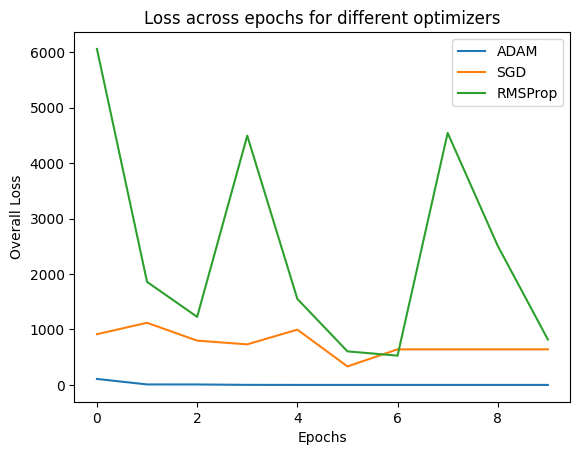

In [6]:
#Listing 3.5 –Train model with various optimizers

#Define loss function
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss
num_epochs = 10
batch_size=16

#Define a model object from the class defined earlier
model = NeuralNetwork()

#Train network using RMSProp optimizer
rmsprp_optimizer = tch.optim.RMSprop(model.parameters()
, lr=0.01, alpha=0.9
, eps=1e-08, weight_decay=0.1
, momentum=0.1, centered=True)
print("RMSProp...")
rmsprop_loss = train_network(model,rmsprp_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train)

#Train network using Adam optimizer

model = NeuralNetwork()
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001)
print("Adam...")
adam_loss = train_network(model,adam_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train)

#Train network using SGD optimizer

model = NeuralNetwork()
sgd_optimizer = tch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("SGD...")
sgd_loss = train_network(model,sgd_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train) 

#Plot the losses for each optimizer across epochs
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(0,10)

ax = plt.subplot(111)
ax.plot(adam_loss,label="ADAM")
ax.plot(sgd_loss,label="SGD")
ax.plot(rmsprop_loss,label="RMSProp")
ax.legend()
plt.xlabel("Epochs")
plt.ylabel("Overall Loss")
plt.title("Loss across epochs for different optimizers")
plt.show()

